In [1]:
import warnings

warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

import numpy as np
import pandas as pd
import scanpy as sc
# import SEACells

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Peaks data
from scipy.io import mmread

%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

sc.set_figure_params(figsize=(10,10),dpi=120)

In [2]:
rna = sc.read_h5ad('../data/seacells-rna-multiome10x-mouse.h5ad')
atac = sc.read_h5ad('../data/seacells-atac-multiome10x-mouse.h5ad')
atac_meta_ad = sc.read_h5ad('../data/seacell-meta-atac-multiome10x-mouse.h5ad')
rna_meta_ad  = sc.read_h5ad('../data/seacell-meta-rna-multiome10x-mouse.h5ad')

/home/ak431480/.conda/envs/pymc/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ak431480/.conda/envs/pymc/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
atac

AnnData object with n_obs × n_vars = 4349 × 122247
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'leiden', 'SEACell'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'nearestGene', 'distToGeneStart', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'
    uns: 'GeneScoresColums', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'GeneScores', 'X_svd', 'X_umap'
    obsp: 'connectivities', 'distances'

In [31]:
# No cells are 'archerypical' in both RNA and ATAC data. Use those that have been recognized in ATAC-data
np.intersect1d(np.unique(rna.obs.SEACell),rna_meta_ad.obs.index)

array([], dtype=object)

In [32]:
cells = []
for idx in atac_meta_ad.obs.index:
    cells.append(atac.obs.SEACell.value_counts()[idx])
atac_meta_ad.obs['SEACell count'] = cells


<AxesSubplot:xlabel='SEACell count', ylabel='Count'>

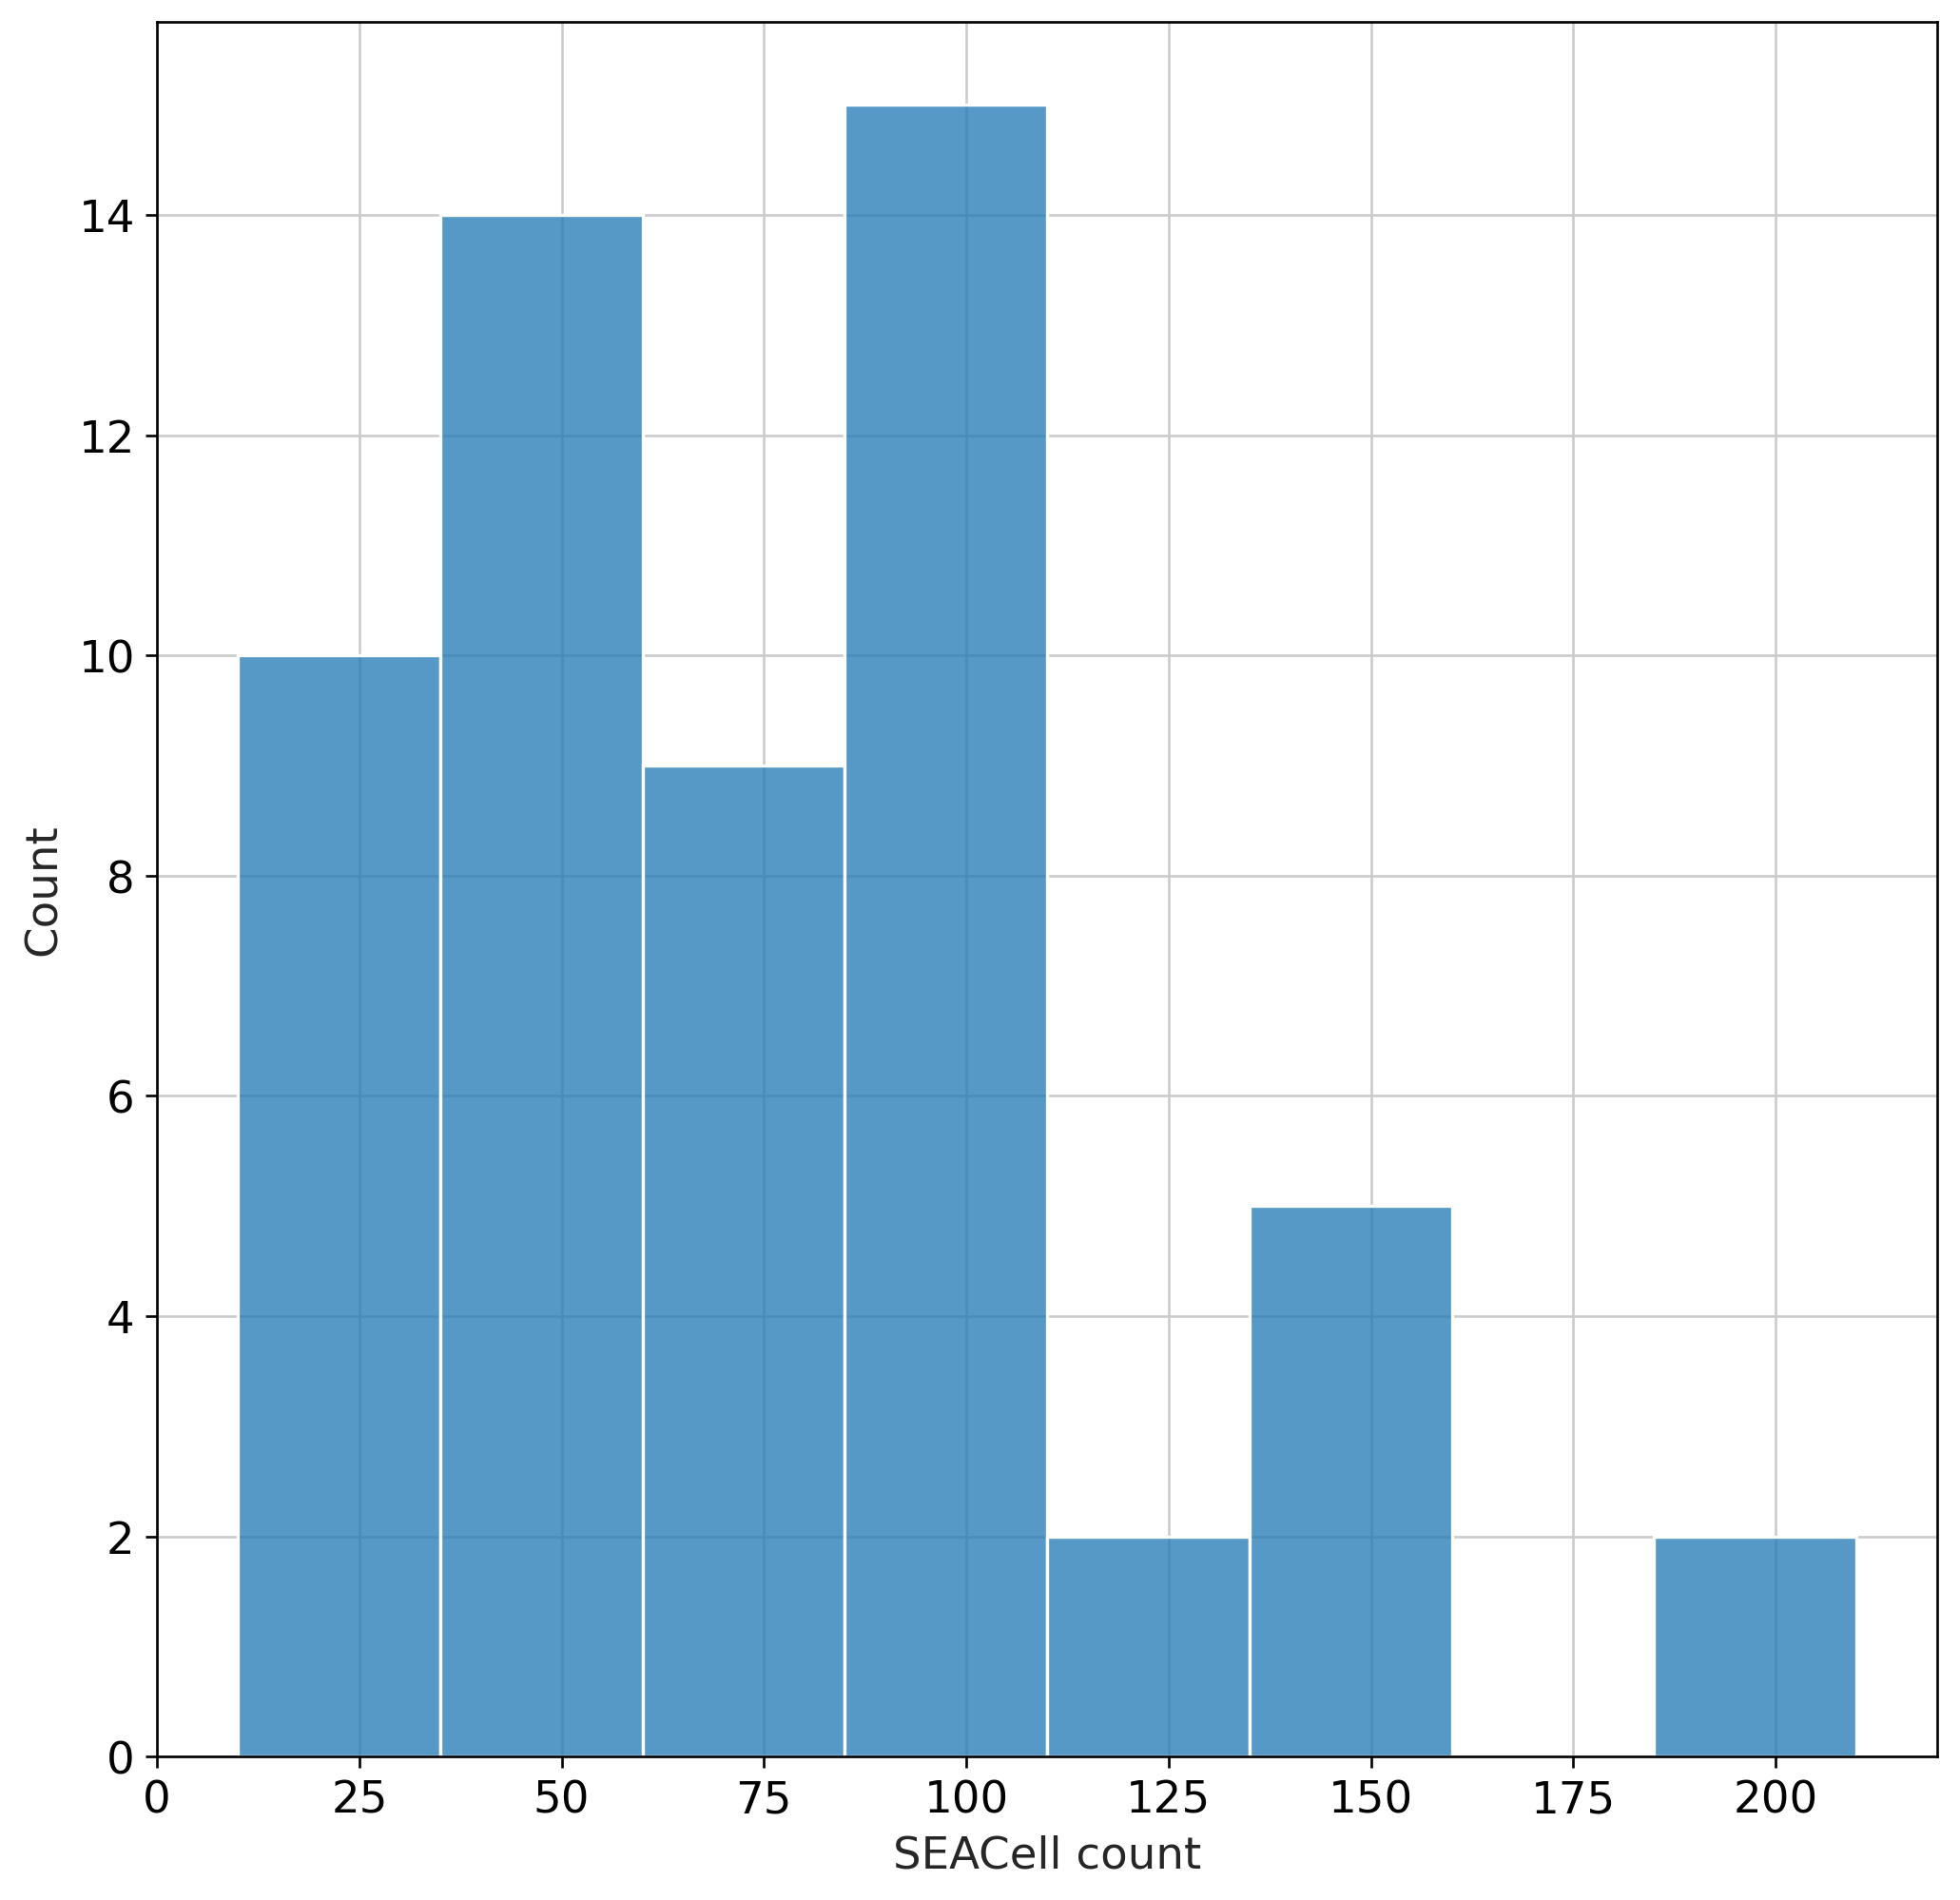

In [33]:
sns.histplot(atac_meta_ad.obs['SEACell count'],binwidth=25)